# Wind Turbine Induction Generator

### The project aims to design an induction generator for a wind turbine with the below specifications:
####    Rated Power: 250 kW
####    Rated Wind Speed: 14 m/s
####    Rated Turbine Speed: 24.3 rpm
####    Gear Ratio: 31.2
####    Number of Poles: 8
####    Line to line voltage: 400 V
####    Frequency: 50 Hz
####    Rated Speed: 758 rpm
####    Gearbox: (Coupled from wind turbine blade)
####    Insulation Class: F

In [1]:
Power=250000 #Power
p=8 #Pole number
Vph=230 #Phase voltage
f=50 #Frequency
ɳ=0.9 #Target Efficiency 
PF=0.85 #Target Power Factor

### Main Dimensions

#### Mechanical constant is selected from the below figure.

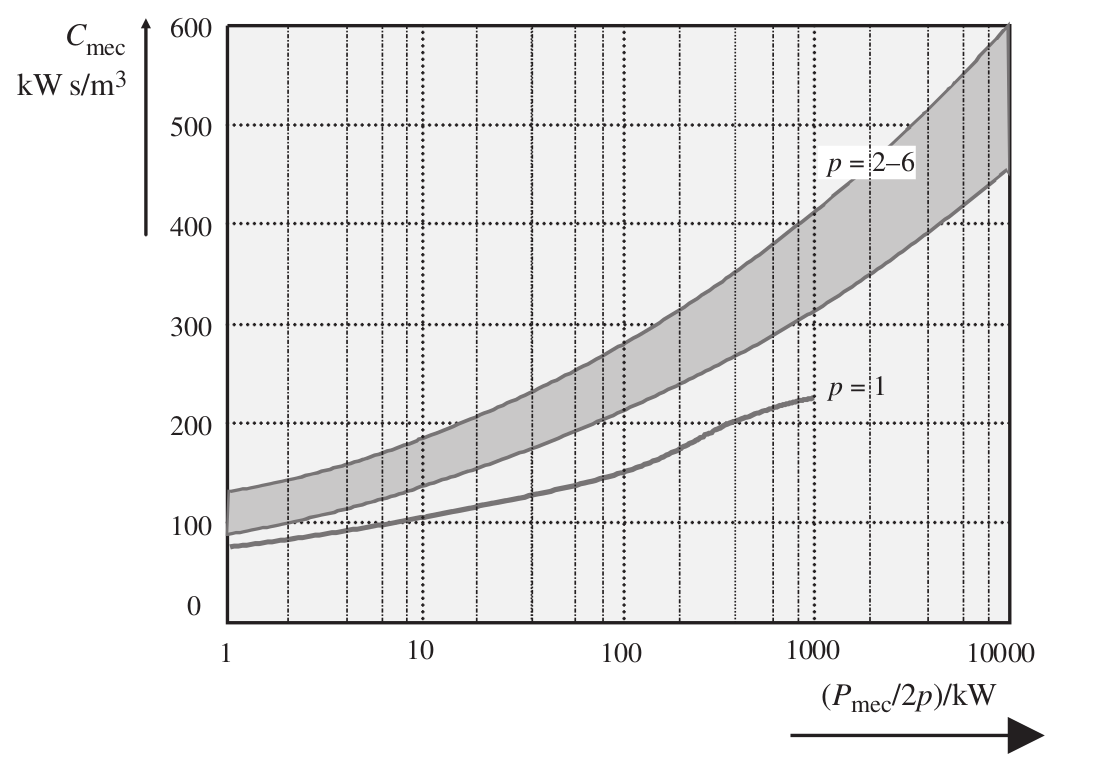

In [74]:
from IPython.display import Image
Image(filename='Images/Cmech.png', width=700, height=700)

In [2]:
import math
Ppp=Power/p #Power per pole
print ('Power per pole =',Ppp,'w')

Power per pole = 31250.0 w


In [3]:
Cmech=200000 #mechanical constant selection
Pp=p/2 #Pole Pair
n_syn=50/Pp #Synchronous speed
print('Synchronous speed =',n_syn,'Hz')

Synchronous speed = 12.5 Hz


In [4]:
from math import pi
X=(pi*(p**(1/3)))/(p) #X=L/D
Di=(Power/(Cmech*n_syn*X))**(1./3.) #Rotor Diameter
L=X*Di #Rotor Length
print ('Rotor Diameter = ',Di,'m')
print ('Length =',L,'m')

Rotor Diameter =  0.5030795991604359 m
Length = 0.3951177932233308 m


In [5]:
Airgap=(0.18+(0.006*(Power**(0.4))))*1e-3 #Airgap for a 8-pole machine
print ('Airgap =',Airgap,'m' ) 

Airgap = 0.0010456199435443284 m


In [6]:
q=3 #Slot per pole per phase number is selected 3
m=3 #3-phase machine
Qs=p*q*m #Total number of slots for stator side
print('Stator slot numbers=',Qs)
Ts=pi*Di/Qs
print ('Slot pitch =',Ts,'m')

Stator slot numbers= 72
Slot pitch = 0.021950988512407267 m


In [7]:
from math import sin
Wp=7/9 #Winding pitch is selected 7/9 to eliminate the 5th harmonic on voltage 
a_elec=pi*p/Qs #Electrical Pole Pitch Angle
pitch=Wp*pi
Kd=(sin(q*a_elec/2))/(q*sin(a_elec/2)) #Distribution Factor
Kp=sin(pitch/2) #Pitch Factor
Kw=Kd*Kp #Winding Factor
print ('Kd =',Kd)
print ('Kp =',Kp)
print ('Kw =',Kw)

Kd = 0.9597950805239389
Kp = 0.9396926207859083
Kw = 0.9019123546349621


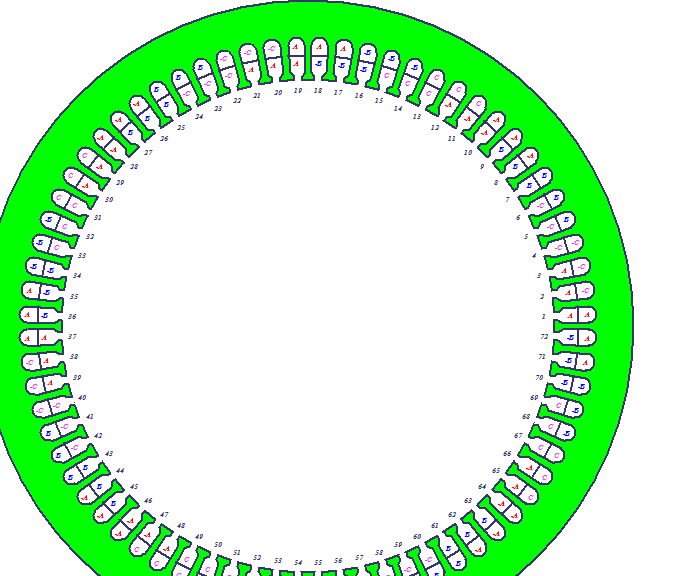

In [8]:
from IPython.display import Image
Image(filename='Images/winding.png', width=700, height=700)

In [9]:
Bg=0.5 #Air gap flux density is chosen 0.8 Tesla. From here we can calculate flux per pole and number of turns per phase.
Tp=(pi*Di)/(p) #Pole pitch 
Φp=Bg*Tp*L #Flux per Pole
print ('Pole pitch is',Tp,'m')
print ('Flux per pole =',Φp,'Wb')

Pole pitch is 0.1975588966116654 m
Flux per pole = 0.039029517630418696 Wb


In [11]:
KE=0.98-(0.005*Pp) #Induced voltage over teminal voltage ration.
Kf=1.08 #Tooth saturization factor 
Nph=(KE*Vph)/(4*Kf*Kw*f*Φp)
Ns=Nph/(Pp*q)
print('Calculated turns per phase =',Nph,'turns')
print('Calculated turns per slot =',Ns,'turns')

Calculated turns per phase = 29.039410639853184 turns
Calculated turns per slot = 2.419950886654432 turns


In [13]:
Nph=36 #Number of turns should be even
Ns=Nph/(Pp*q)
print('Revised turns per phase =',Nph,'turns')
print('Revised turns per slot =',Ns,'turns')

Revised turns per phase = 36 turns
Revised turns per slot = 3.0 turns


In [15]:
Iph=Power/(PF*ɳ*Vph*3) #Phase current
print('Iph =',Iph,'A')

Iph = 473.61939945060146 A


In [16]:
from math import sqrt
Jcos=8 #recommended current density for an 8-pole (Ampere/mm2)
Aco=Iph/Jcos #required wire cross section (mm2)
dco=sqrt(4*Aco/(pi)) #wire gauge diameter (mm) 
print('Wire cross section =',Aco, 'mm2')
print('Wire gauge diameter',dco, 'mm')

Wire cross section = 59.20242493132518 mm2
Wire gauge diameter 8.68210046974683 mm


In [22]:
a=40 #number of parallel conductors to reduce dco
Aco=Iph/(Jcos*a)
dco=sqrt(4*Aco/(pi))
print('Wire cross section =',Aco, 'mm2')
print('Wire gauge diameter',dco, 'mm')

Wire cross section = 1.4800606232831295 mm2
Wire gauge diameter 1.3727606179408895 mm


In [25]:
dco=1.5 #wire diameter is selected
Kf=0.55#Fill factor for bog machines
Ks=0.5 #Strandıng Factor
Asu=(pi*(dco**(2.))*a*Ns)/(4*Kf*Ks)
print ('Required area of slot =',Asu*1e-6,'m2')

Required area of slot = 0.0007711181967902219 m2


### Stator Dimensions

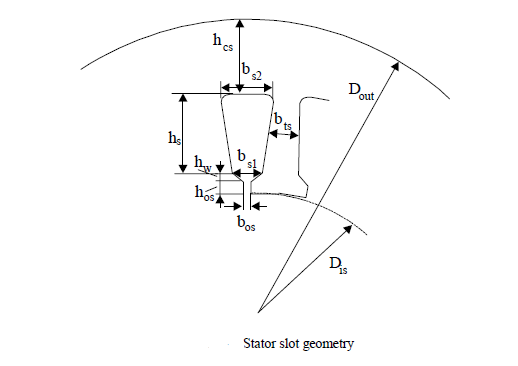

In [26]:
#Slot shape is chosen as figure below
from IPython.display import Image
Image(filename='Images/slotshape.png', width=700, height=700)

In [28]:
from math import tan
Bt=1.6 #Tooth flux density (T) to prevent saturization in the tooth
Kfe=0.95 
b_ts=((Bg*Ts)/(Kfe*Bt))
h_os=0.001
h_w=0.001
b_s1=((pi*(Di+2*h_os+2*h_w))/Qs)-(b_ts)
b_s2=0.017 
h_s=((2*(Asu*1e-6))/(b_s1+b_s2))
b_os=3*1e-3 
print('b_ts =',b_ts,'m')
print('b_s1 =',b_s1,'m')
print('h_os =',h_os,'m')
print('b_os =',b_os,'m')
print('h_w =',h_w,'m')
print('b_s2 =',b_s2,'m')
print('h_s =',h_s,'m')

b_ts = 0.0072207199053971275 m
b_s1 = 0.014904801532209572 m
h_os = 0.001 m
b_os = 0.003 m
h_w = 0.001 m
b_s2 = 0.017 m
h_s = 0.04833869259532849 m


In [29]:
Fmg=1.2*Airgap*Bg/(1.256*1e-6)
H_ts=1760 #Chosen from magnetization charactereristics of core to have tooth flux density around 1.55 tesla
Fmts=H_ts*(h_s+h_os+h_w)
Kst=0.4
Fmtr=(Kst*Fmg)-Fmts #Rotor MMF af Stator MMF should be approximately equal.
print('Airgap MMF =',Fmg,'Aturns')
print('Stator tooth MMF =',Fmts,'Aturns')
print ('Rotor tooth MMF =',Fmtr,'Aturns')

Airgap MMF = 499.4999730307302 Aturns
Stator tooth MMF = 88.59609896777815 Aturns
Rotor tooth MMF = 111.20389024451393 Aturns


In [30]:
B_bc=1.4 #Back core flux density
h_cs=Φp/(2*L*B_bc) #Back core width 
print('h_cs =',h_cs,'m')

h_cs = 0.035278374394940255 m


In [31]:
Dout=Di+2*(h_s+h_os+h_w+h_cs)
print('Dout =',Dout,'m')

Dout = 0.6743137331409734 m


### Rotor Dimensions

In [32]:
Qr=56 #Rotor side slot numbers according to ABB standards for a 72 stator slot number and to have tooth width bigger that 1mm 
print('Rotor slot numbers=',Qr)

Rotor slot numbers= 56


In [33]:
KI=(0.8*PF)+0.2 #A Constant to have stator MMF higher than Rotor MMF
Ib=(KI*2*3*Nph*Kw*Iph)/Qr
print ('Ib =',Ib,'A')

Ib = 1449.9139058801 A


In [34]:
Jb=3.42 #Current density in the bars (A/mm2)
Ab=Ib/(Jb*1e6) #Area pf each bar (m2)
print('Ab =',Ab,'m2')

Ab = 0.0004239514344678655 m2


In [36]:
Tr=(pi*(Di-(2*Airgap)))/Qr #Rotor slot pitch
print ('Tr =',Tr,'m')

Tr = 0.028105381232627704 m


In [61]:
Btr=1.6 #Rotor tooth flux density
b_tr=Bg*Tr/(Btr*0.96) #Rotor tooth width to prevent rotor flux density from saturization
print ('b_tr =',b_tr,'m')

b_tr = 0.009148887119995997 m


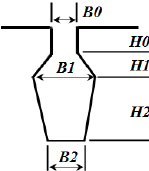

In [38]:
#Rotor slot shape is chosen as figure below
from IPython.display import Image
Image(filename='Images/rotorslot.png', width=300, height=300)

In [58]:
h_or=1e-3
b_or=1.5e-3
Dre=Di-2*Airgap
b_1=Tr-b_tr
b_2=0.014
h_r=0.026
Ab=(b_1+b_2)*h_r/2 #Achieved slot area for bars should be greater than required area 
print('Dre =',Dre,'m')
print('b_1 =',b_1,'m')
print('b_2 =',b_2,'m')
print ('h_r',h_r,'m')
print ('Ab =',Ab,'m2') 

Dre = 0.5009883592733472 m
b_1 = 0.017649510238346565 m
b_2 = 0.014 m
h_r 0.026 m
Ab = 0.0004114436330985053 m2


In [71]:
B_br=1.4 #Back rotor flux density
b_br=Φp/(2*L*B_br) #Back rotor width
Dir=Dre-2*(h_r+h_or+b_br) #Inner rotor diameter
print ('Back rotor width =',b_br,'m')
print('Dir=',Dir,'m')

Back rotor width = 0.035278374394940255 m
Dir= 0.3764316104834666 m


In [46]:
#Form catalogues standard shaft diameter for 250kw 8-pole machines is 100 mm
D_shaft=0.1
print ('D_shaft =',D_shaft,'m')

D_shaft = 0.1 m


In [47]:
Ier=Ib/(2*sin(2*180/Qr))
Jer=0.75*Jb
Aer=Ier/(Jer*1e6)
print ('Ier =',Ier,'A')
print ('Aer =',Aer,'m2')

Ier = 5004.034604776995 A
Aer = 0.0019508906841235849 m2


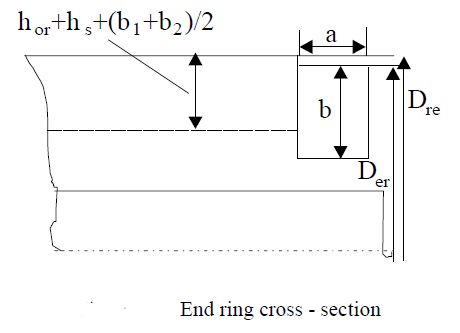

In [48]:
from IPython.display import Image
Image(filename='Images/endring.jpg', width=700, height=700)

In [50]:
Der=Dre-0.005 #In general
b=(h_r+h_or)
a=Aer/b
print(Dre)
print ('b =',b,'m')
print ('a =',a,'m')

0.5009883592733472
b = 0.027 m
a = 0.07225521052309573 m


### Stator and Rotor shape

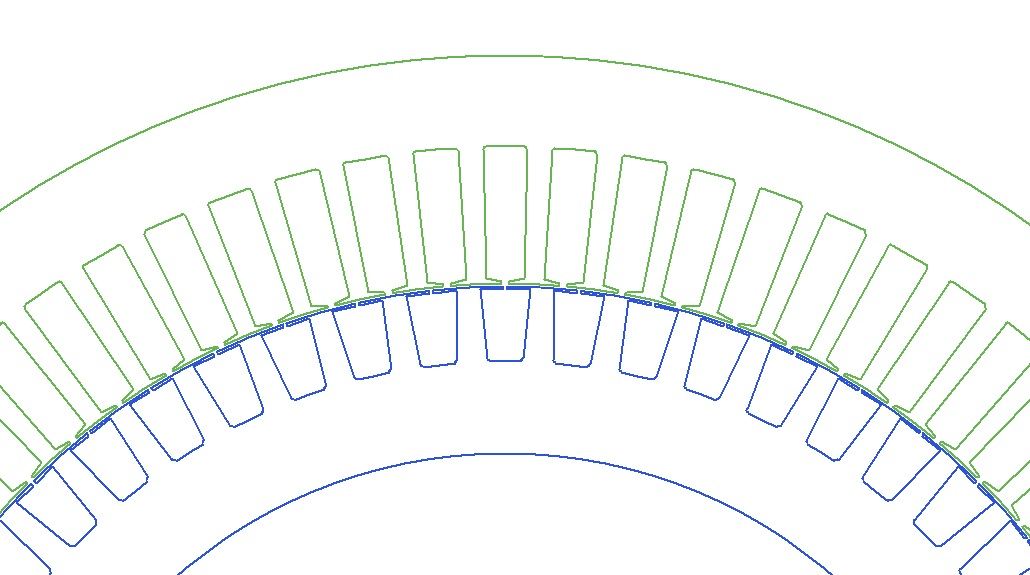

In [72]:
from IPython.display import Image
Image(filename='Images/rotorstator.jpg', width=700, height=700)

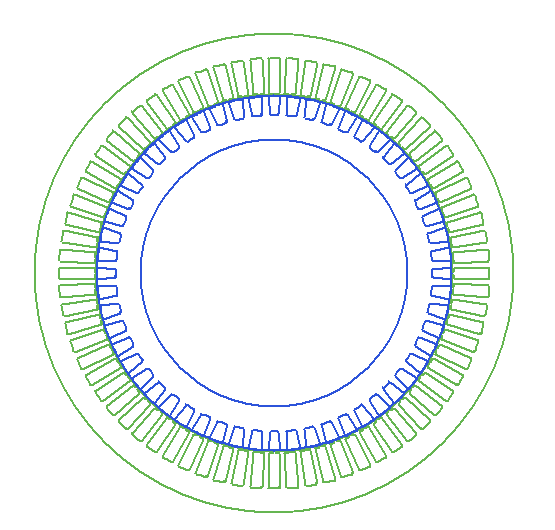

In [73]:
from IPython.display import Image
Image(filename='Images/rotorstator.png', width=700, height=700)

### Magnetization Current

In [68]:
# Carters Coefficient calculation
ɣ1=(b_os**2)/(5*Airgap+b_os)
ɣ2=(b_or**2)/(5*Airgap+b_or)
K_c1=Ts/(Ts-ɣ1)
K_c2=Tr/(Tr-ɣ2)
K_c=K_c1*K_c2 #Carters coefficient should be approximately equal to the assumed valud 1.2
print(ɣ1)
print ('Carters Coefficient =',K_c)

0.001093812703875701
Carters Coefficient = 1.065116526190838


In [69]:
from math import exp
Ccs=0.88*exp(-0.4*(B_bc**2)) #Subnitary empirical coefficient for stator
Ccr=0.88*exp(-0.4*(B_br**2)) #Subnitary empirical coefficient for rotor
H_bc=760 #From magnetization curve
Fmcs=Ccs*(pi*(Dout-h_cs)*H_bc*B_bc)/p #Stator back MMF
H_br=2460 #From magnetization curve
Fmcr=Ccr*(pi*(D_shaft-b_br)*H_br*B_br/(p)) #Rotor back MMF
print ('Stator back core MMF =',Fmcs,'Aturns')
print ('Rotor back core MMF =',Fmcr,'Aturns')

Stator back core MMF = 107.28084879769507 Aturns
Rotor back core MMF = 35.16966598088301 Aturns


In [70]:
F1m=2*((K_c*Airgap*Bg)/(4*pi*1e-7)+Fmts+Fmtr+Fmcs+Fmcr)
print ('Magnetization MMF =',F1m,'Aturns')

Magnetization MMF = 1570.7609442525988 Aturns


In [75]:
Im=(pi*Pp*F1m/2)/(3*sqrt(2)*Nph*Kw)
print ('Magnetizing current =',Im,'A')

Magnetizing current = 61.92288064071407 A


### Resistances and Inductances

In [76]:
T=pi*Di/p
y=5*T/6
L_end=2.2*y-0.012
print('L_end =',L_end,'m')

L_end = 0.3501913104547199 m


In [87]:
print(Di-2*(h_r+h_or+b_br))

0.3958012247654956


### Losses and Efficiency Calculation

### Simulation Results

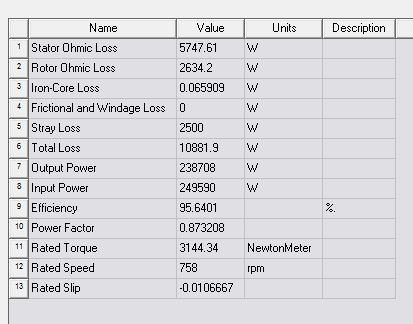

In [77]:
from IPython.display import Image
Image(filename='Images/rated performance.jpg', width=700, height=700)

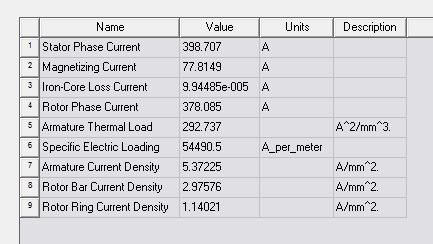

In [80]:
from IPython.display import Image
Image(filename='Images/rated electric data.jpg', width=700, height=700)

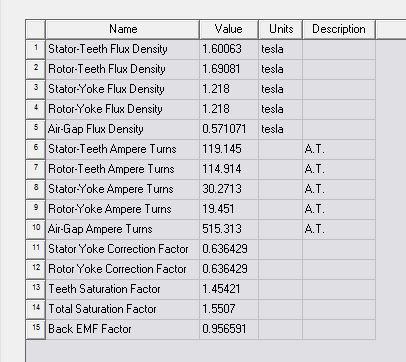

In [81]:
from IPython.display import Image
Image(filename='Images/rated magnetic data.jpg', width=700, height=700)